# Implementation of K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

(500, 2) (500,)


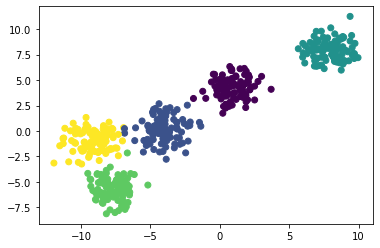

In [2]:
# Load the dataset

X, y = make_blobs(n_samples=500, centers=5, shuffle=True, random_state=3)
print(X.shape, y.shape)

# Visualize the dataset

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [3]:
# K-means Clustering algorithm

# Euclidean Distance
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


# minimizes within-cluster variances
def loss(clusters):
    val = 0
    for kx in range(len(clusters)):
        data = np.array(clusters[kx]['points'])
        val += np.mean((data - clusters[kx]['center'])**2)
    return val


def clustering(X, k = 5, max_itr = 100):
    
    labels = ['blue', 'green', 'yellow', 'orange', 'red']
    clusters = []
    
    # Step 1: Initialize cluster centers
    for kx in range(k):
        ind = np.random.randint(X.shape[0])
        
        clusters.append({'center': X[ind, :], 'label': labels[kx], 'points': []})
    
    
    err_list = []
    for m in range(max_itr):
        
        # Step 2: Assign data points to nearest centroid
        
        for ix in range(X.shape[0]):
            d_list = []
            for kx in range(k):
                d = distance(X[ix], clusters[kx]['center'])
                d_list.append(d)

            ind = np.argmin(d_list)
            clusters[ind]['points'].append(X[ix])
        
        # compute error
        
        err_list.append(loss(clusters))
        
        # Step 3: Update clusters center
        
        for kx in range(k):
            pts = np.array(clusters[kx]['points'])
        
            # If cluster has non zero points update center and clear points
            if(pts.shape[0] > 0):
                clusters[kx]['center'] = np.mean(clusters[kx]['points'], axis=0)
            
            if m < max_itr-1 :
                clusters[kx]['points'] = []
    
    return clusters, err_list

In [4]:
# Plot points and centers of clusters

def plotClusters(clusters, k):
    
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if(pts.shape[0] > 0):
            plt.scatter(pts[:, 0], pts[:, 1], c=clusters[kx]['label'])
        
        center = clusters[kx]['center']
        plt.scatter(center[0], center[1], c='black', marker='*')
    plt.show()

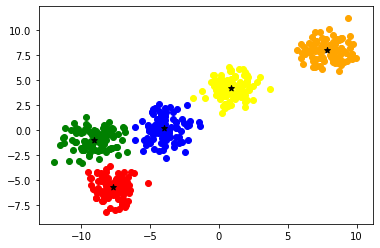

In [7]:
clusters, err_list = clustering(X, k=5)
plotClusters(clusters, k=5)

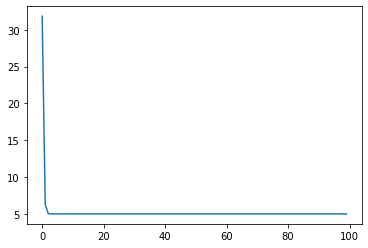

In [8]:
# Reduction of varaince within cluster

plt.plot(err_list)
plt.show()